In [213]:
import numpy as np
import pandas as pd
import warnings
from tqdm import tqdm
import random
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import FuncFormatter
import seaborn as sns

tqdm.pandas()
warnings.filterwarnings("ignore")

In [214]:
# attacks against father and mother records
f2gf = pd.read_csv("./results/nb/father_against_grandfather.csv")
gf2f = f2gf.T.reindex(index=f2gf.columns, columns=f2gf.index)
gf2f

,0,1,2,3,4,5,6,7,8,9,...,2682,2683,2684,2685,2686,2687,2688,2689,2690,2691
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2687,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2688,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2689,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2690,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [215]:
m2gm = pd.read_csv("./results/nb/mother_against_grandmother.csv")
gm2m = m2gm.T.reindex(index=m2gm.columns, columns=m2gm.index)
gm2m

,0,1,2,3,4,5,6,7,8,9,...,2682,2683,2684,2685,2686,2687,2688,2689,2690,2691
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2687,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2688,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2689,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2690,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [216]:
s2f = pd.read_csv("./results/nb/self_against_father.csv")
s2f

,0,1,2,3,4,5,6,7,8,9,...,2682,2683,2684,2685,2686,2687,2688,2689,2690,2691
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2687,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2688,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2689,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2690,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [217]:
s2m = pd.read_csv("./results/nb/self_against_mother.csv")
s2m

,0,1,2,3,4,5,6,7,8,9,...,2682,2683,2684,2685,2686,2687,2688,2689,2690,2691
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2687,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2688,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2689,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2690,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [249]:
gf2f.sum().value_counts() / 2692 * 100

0    99.219911
1     0.222883
4     0.148588
7     0.148588
2     0.111441
3     0.111441
5     0.037147
Name: count, dtype: float64

In [250]:
gm2m.sum().value_counts() / 2692 * 100

0    99.554235
1     0.148588
4     0.111441
8     0.074294
2     0.037147
6     0.037147
5     0.037147
Name: count, dtype: float64

In [246]:
s2f.sum().value_counts() / 2692 * 100

0     88.224368
1      4.346211
2      2.786033
3      2.488856
4      1.188707
5      0.557207
7      0.222883
6      0.148588
23     0.037147
Name: count, dtype: float64

In [247]:
s2m.sum().value_counts() / 2692 * 100

0    96.025260
1     3.120357
2     0.668648
4     0.074294
3     0.074294
9     0.037147
Name: count, dtype: float64

In [222]:
match = gf2f & gm2m
match

,0,1,2,3,4,5,6,7,8,9,...,2682,2683,2684,2685,2686,2687,2688,2689,2690,2691
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2687,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2688,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2689,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2690,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [223]:
match.sum().value_counts()

0    2692
Name: count, dtype: int64

In [248]:
match = s2f & s2m
match.sum().value_counts()

0    2692
Name: count, dtype: int64

In [224]:
match_altf = pd.DataFrame(
    np.logical_and(s2f, m2gm),
    index=s2f.index,
    columns=s2f.columns
)
match_altm = pd.DataFrame(
    np.logical_and(s2f, f2gf),
    index=s2f.index,
    columns=s2f.columns
)
match_altf

,0,1,2,3,4,5,6,7,8,9,...,2682,2683,2684,2685,2686,2687,2688,2689,2690,2691
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2687,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2688,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2689,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2690,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [225]:
match_altf.sum().value_counts()

0    2692
Name: count, dtype: int64

In [226]:
match_altm.sum().value_counts()

0    2692
Name: count, dtype: int64

In [227]:
match_altf2 = pd.DataFrame(
    np.logical_and(s2m, m2gm),
    index=s2f.index,
    columns=s2f.columns
)
match_altm2 = pd.DataFrame(
    np.logical_and(s2m, f2gf),
    index=s2f.index,
    columns=s2f.columns
)
match_altf2

,0,1,2,3,4,5,6,7,8,9,...,2682,2683,2684,2685,2686,2687,2688,2689,2690,2691
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2687,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2688,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2689,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2690,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [228]:
match_altf2.sum().value_counts()

0    2692
Name: count, dtype: int64

In [229]:
match_altm2.sum().value_counts()

0    2692
Name: count, dtype: int64

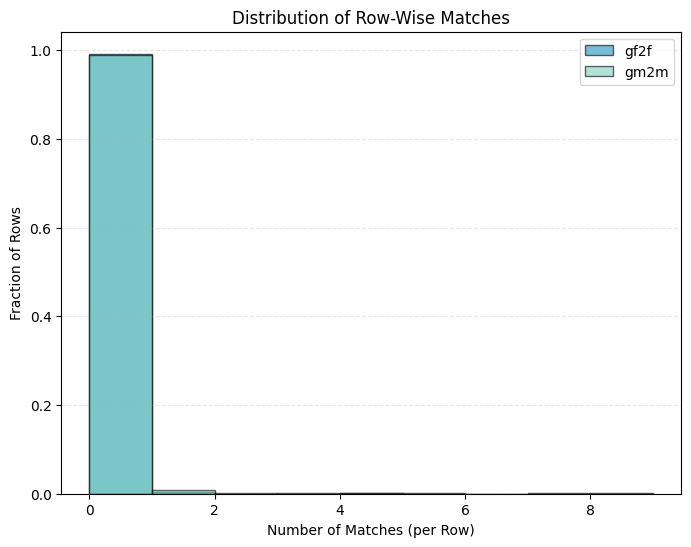

In [230]:
counts1 = gf2f.sum(axis=1)
counts2 = gm2m.sum(axis=1)

plt.figure(figsize=(8, 6))
bins = np.arange(0, max(max(counts1), max(counts2)) + 1, 1)
plt.hist(counts1, bins=bins, alpha=0.6, color="#1d91c0", label="gf2f", edgecolor="black", density=True)
plt.hist(counts2, bins=bins, alpha=0.6, color="#7fcdbb", label="gm2m", edgecolor="black", density=True)

plt.xlabel("Number of Matches (per Row)")
plt.ylabel("Fraction of Rows")
plt.title("Distribution of Row-Wise Matches")
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

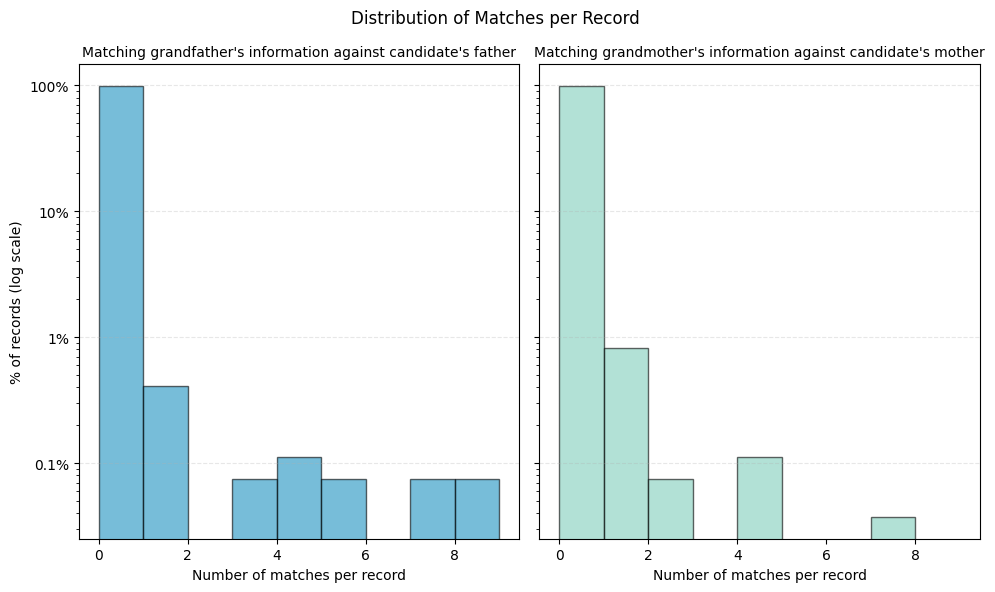

In [254]:
class SlightlyModifiedPercentFormatter(PercentFormatter):
    def __call__(self, x, pos=None):
        if np.isclose(x, 0.001):  # If value is ~0.1% (log scale's bottom)
            return "0.1%"
        return super().__call__(x, pos)

counts1 = gf2f.sum(axis=1)
counts2 = gm2m.sum(axis=1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
bins = np.arange(0, max(max(counts1), max(counts2)) + 1, 1)

ax1.hist(counts1, bins=bins, alpha=0.6, color="#1d91c0", edgecolor="black", density=True)
ax2.hist(counts2, bins=bins, alpha=0.6, color="#7fcdbb", edgecolor="black", density=True)

plt.suptitle("Distribution of Matches per Record")
ax1.set_title("Matching grandfather's information against candidate's father", fontsize=10)
ax2.set_title("Matching grandmother's information against candidate's mother", fontsize=10)
ax1.set_yscale('log')
ax1.set_ylabel("% of records (log scale)")
ax1.set_xlabel("Number of matches per record")
ax2.set_xlabel("Number of matches per record")
ax1.yaxis.set_major_formatter(SlightlyModifiedPercentFormatter(1.0))  # Convert to %
ax2.yaxis.set_major_formatter(SlightlyModifiedPercentFormatter(1.0))  # Convert to %
ax1.grid(axis='y', linestyle='--', alpha=0.3)
ax2.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

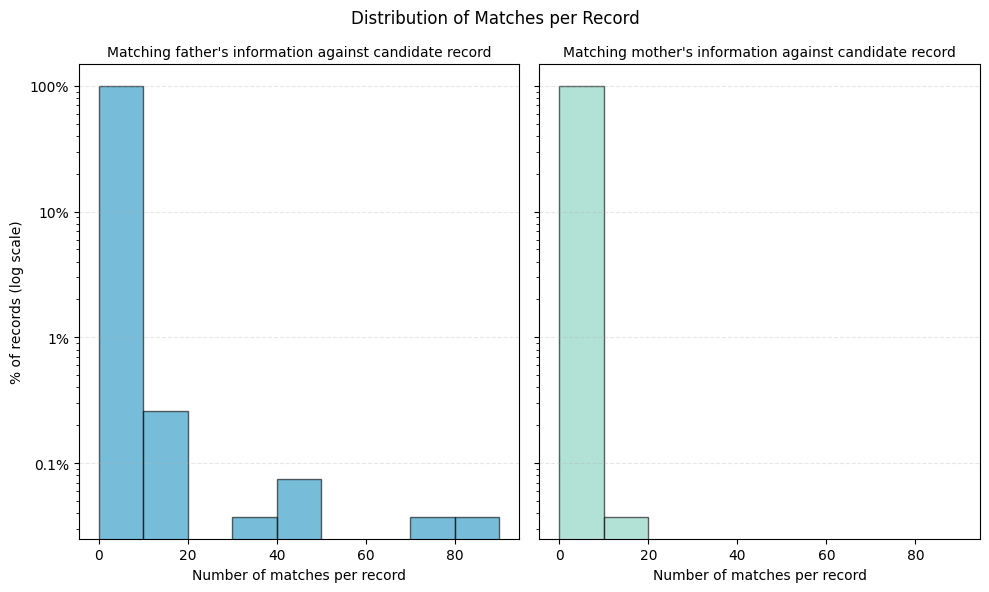

In [232]:
class SlightlyModifiedPercentFormatter(PercentFormatter):
    def __call__(self, x, pos=None):
        if np.isclose(x, 0.0001):  # If value is ~0.1% (log scale's bottom)
            return "0.1%"
        return super().__call__(x, pos)

counts1 = s2f.sum(axis=1)
counts2 = s2m.sum(axis=1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
bins = np.arange(0, max(max(counts1), max(counts2)) + 1, 10)

ax1.hist(counts1, bins=bins, alpha=0.6, color="#1d91c0", edgecolor="black", density=True)
ax2.hist(counts2, bins=bins, alpha=0.6, color="#7fcdbb", edgecolor="black", density=True)

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.suptitle("Distribution of Matches per Record")
ax1.set_title("Matching father's information against candidate record", fontsize=10)
ax2.set_title("Matching mother's information against candidate record", fontsize=10)
ax1.set_yscale('log')
ax1.set_ylabel("% of records (log scale)")
ax1.set_xlabel("Number of matches per record")
ax2.set_xlabel("Number of matches per record")
ax1.yaxis.set_major_formatter(SlightlyModifiedPercentFormatter(0.1))  # Convert to %
ax2.yaxis.set_major_formatter(SlightlyModifiedPercentFormatter(0.1))  # Convert to %
ax1.grid(axis='y', linestyle='--', alpha=0.3)
ax2.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

In [233]:
# attacks against sibling records
s2s = pd.read_csv("./results/nb/self_against_sibling.csv")
s2s

,0,1,2,3,4,5,6,7,8,9,...,2682,2683,2684,2685,2686,2687,2688,2689,2690,2691
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2687,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2688,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2689,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2690,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [234]:
f2f = pd.read_csv("./results/nb/father_against_father.csv")
f2f

,0,1,2,3,4,5,6,7,8,9,...,2682,2683,2684,2685,2686,2687,2688,2689,2690,2691
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2687,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2688,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2689,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2690,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [235]:
m2m = pd.read_csv("./results/nb/mother_against_mother.csv")
m2m

,0,1,2,3,4,5,6,7,8,9,...,2682,2683,2684,2685,2686,2687,2688,2689,2690,2691
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2687,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2688,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2689,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2690,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [236]:
gf2gf = pd.read_csv("./results/nb/gfather_against_gfather.csv")
gf2gf

,0,1,2,3,4,5,6,7,8,9,...,2682,2683,2684,2685,2686,2687,2688,2689,2690,2691
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2687,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2688,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2689,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2690,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [237]:
gm2gm = pd.read_csv("./results/nb/gmother_against_gmother.csv")
gm2gm

,0,1,2,3,4,5,6,7,8,9,...,2682,2683,2684,2685,2686,2687,2688,2689,2690,2691
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2687,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2688,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2689,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2690,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [255]:
s2s.sum().value_counts() / 2692 * 100

0     79.680535
23     7.169391
9      3.863299
7      3.231798
1      3.008915
2      2.154532
4      0.408618
3      0.334324
19     0.037147
16     0.037147
5      0.037147
10     0.037147
Name: count, dtype: float64

In [256]:
f2f.sum().value_counts() / 2692 * 100

0      52.265973
1      14.078752
105     3.900446
2       3.640416
79      2.934621
76      2.823180
6       2.451709
3       2.340267
52      1.931649
50      1.857355
7       1.820208
49      1.820208
4       1.783061
5       1.300149
34      1.263001
31      1.151560
10      0.742942
9       0.668648
14      0.520059
11      0.408618
8       0.297177
Name: count, dtype: float64

In [257]:
m2m.sum().value_counts() / 2692 * 100

0      52.043091
1      13.187221
101     3.751857
2       3.046062
3       2.897474
78      2.897474
70      2.600297
67      2.488856
7       2.340267
4       2.080238
6       2.005944
48      1.783061
40      1.485884
8       1.485884
5       1.114413
12      0.891530
22      0.817236
10      0.742942
9       0.668648
17      0.631501
15      0.557207
13      0.482912
Name: count, dtype: float64

In [260]:
match = s2s & f2f & m2m & gf2gf & gm2gm
match

,0,1,2,3,4,5,6,7,8,9,...,2682,2683,2684,2685,2686,2687,2688,2689,2690,2691
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2687,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2688,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2689,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2690,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [261]:
match.sum().value_counts()

0    2692
Name: count, dtype: int64

In [241]:
match[match.any(axis=1)].loc[:, match.any(axis=0)]

""


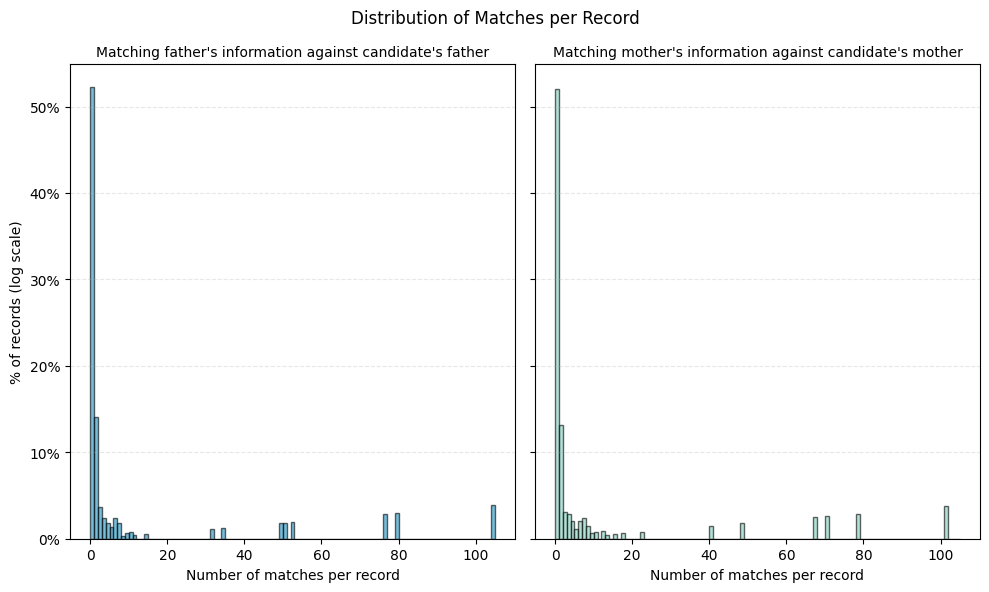

In [277]:
class SlightlyModifiedPercentFormatter(PercentFormatter):
    def __call__(self, x, pos=None):
        if np.isclose(x, 0.0001):  # If value is ~0.1% (log scale's bottom)
            return "0.1%"
        return super().__call__(x, pos)

counts1 = f2f.sum(axis=1)
counts2 = m2m.sum(axis=1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
bins = np.arange(0, max(max(counts1), max(counts2)) + 1, 1)

ax1.hist(counts1, bins=bins, alpha=0.6, color="#1d91c0", edgecolor="black", density=True)
ax2.hist(counts2, bins=bins, alpha=0.6, color="#7fcdbb", edgecolor="black", density=True)

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.suptitle("Distribution of Matches per Record")
ax1.set_title("Matching father's information against candidate's father", fontsize=10)
ax2.set_title("Matching mother's information against candidate's mother", fontsize=10)
# ax1.set_yscale('log')
ax1.set_ylabel("% of records (log scale)")
ax1.set_xlabel("Number of matches per record")
ax2.set_xlabel("Number of matches per record")
ax1.yaxis.set_major_formatter(SlightlyModifiedPercentFormatter(1.0))  # Convert to %
ax2.yaxis.set_major_formatter(SlightlyModifiedPercentFormatter(1.0))  # Convert to %
ax1.grid(axis='y', linestyle='--', alpha=0.3)
ax2.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

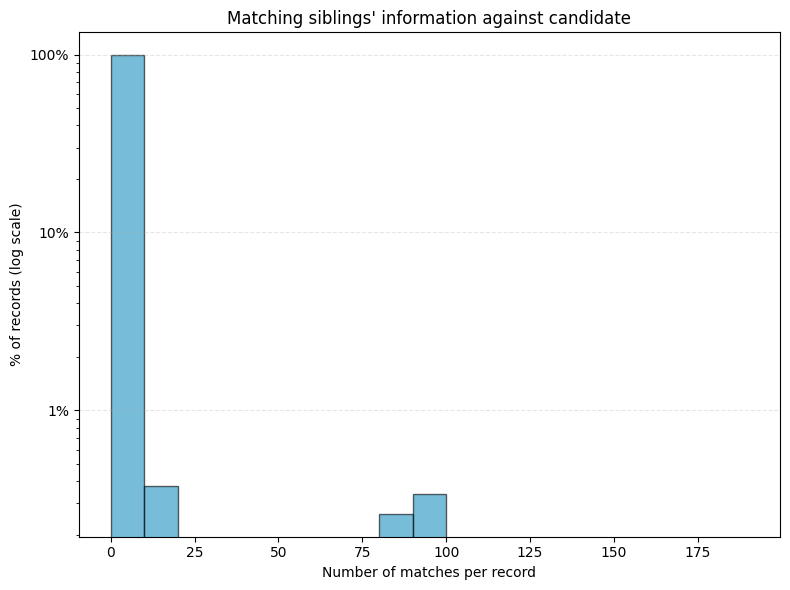

In [243]:
class SlightlyModifiedPercentFormatter(PercentFormatter):
    def __call__(self, x, pos=None):
        if np.isclose(x, 0.0001):  # If value is ~0.1% (log scale's bottom)
            return "0.1%"
        return super().__call__(x, pos)

counts1 = s2s.sum(axis=1)

fig, (ax1) = plt.subplots(1, 1, figsize=(8, 6))
bins = np.arange(0, max(counts1) + 1, 10)

ax1.hist(counts1, bins=bins, alpha=0.6, color="#1d91c0", edgecolor="black", density=True)

plt.grid(axis='y', linestyle='--', alpha=0.3)
ax1.set_title("Matching siblings' information against candidate", fontsize=12)
ax1.set_yscale('log')
ax1.set_ylabel("% of records (log scale)")
ax1.set_xlabel("Number of matches per record")
ax1.yaxis.set_major_formatter(SlightlyModifiedPercentFormatter(0.1))  # Convert to %
ax1.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()